In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [2]:
Current_Snapshot = 99
Subhalo_Index = 329508


In [3]:
PartType4_Fields = ['Coordinates', 'Masses', 'GFM_StellarFormationTime']
PartType4_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 4, PartType4_Fields)


In [4]:
Subhalo_Dict = il.groupcat.loadSingle(
    basePath, Current_Snapshot, -1, Subhalo_Index)


In [5]:
PartType4_Dict['Distance'] = np.linalg.norm(
    PartType4_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'], axis=1)


Text(0.5, 1.0, 'Stellar Mass Distribution')

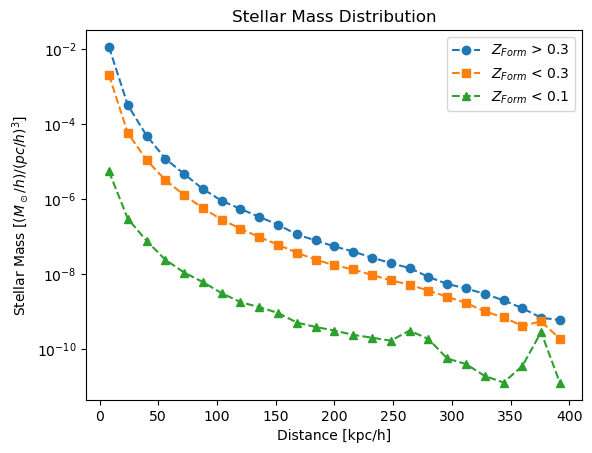

In [24]:
bins = 25
range = [0, 400]
condition1 = PartType4_Dict['GFM_StellarFormationTime'] > 0.3
hist1, binrange1 = np.histogram(PartType4_Dict['Distance'][np.where(condition1)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition1)[0]])
plt.semilogy((binrange1[:-1] + binrange1[1:]) / 2, hist1 / (4/30 * np.pi * (np.power(
    binrange1[1:], 3) - np.power(binrange1[:-1], 3))), '--o', label='$Z_{Form}$ > 0.3')

condition2 = PartType4_Dict['GFM_StellarFormationTime'] < 0.3
hist2, binrange2 = np.histogram(PartType4_Dict['Distance'][np.where(condition2)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition2)[0]])
plt.semilogy((binrange2[:-1] + binrange2[1:]) / 2, hist2 / (4/30 * np.pi * (np.power(
    binrange2[1:], 3) - np.power(binrange2[:-1], 3))), '--s', label='$Z_{Form}$ < 0.3')

condition3 = (PartType4_Dict['GFM_StellarFormationTime'] < 0.1)
hist3, binrange3 = np.histogram(PartType4_Dict['Distance'][np.where(condition3)[0]], range=(
    range), bins=bins, weights=PartType4_Dict['Masses'][np.where(condition3)[0]])
plt.semilogy((binrange3[:-1] + binrange3[1:]) / 2, hist3 / (4/30 * np.pi * (np.power(
    binrange3[1:], 3) - np.power(binrange3[:-1], 3))), '--^', label='$Z_{Form}$ < 0.1')


plt.legend()
plt.xlabel('Distance [kpc/h]')
plt.ylabel('Stellar Mass [$ (M_\odot/h)/(pc/h)^3$]')
plt.title('Stellar Mass Distribution')


In [27]:
PartType0_Fields = ['Coordinates', 'Masses',
                    'ElectronAbundance', 'InternalEnergy']
PartType0_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 0, PartType0_Fields)


In [28]:
x_e = PartType0_Dict['ElectronAbundance'].astype(np.float64)
internal_energy = PartType0_Dict['InternalEnergy'].astype(np.float64)
gas_cell_masses = PartType0_Dict['Masses'].astype(np.float64)

m_p = 1.673E-24
X_H = 0.76
unit_switching = 1E10
mean_molecular_weight = 4*m_p/(1+3*X_H+4*X_H*x_e)
k_B = 1.38E-16
gas_cell_temperature_in_Kelvin = 2/3*internal_energy / \
    k_B*unit_switching*mean_molecular_weight
PartType0_Dict['Temperature'] = gas_cell_temperature_in_Kelvin
PartType0_Dict['Distance'] = np.linalg.norm(
    PartType0_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'], axis=1)


Text(0.5, 1.0, 'Gas Mass Distribution')

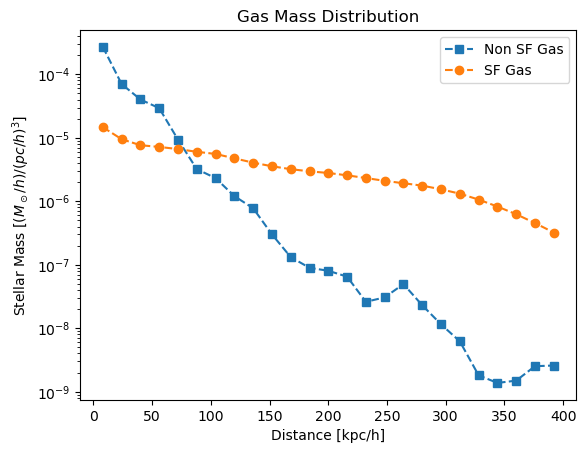

In [29]:
bins = 25
range = [0, 400]
condition1 = PartType0_Dict['Temperature'] < 15000
hist1, binrange1 = np.histogram(PartType0_Dict['Distance'][np.where(condition1)[0]], range=(
    range), bins=bins, weights=PartType0_Dict['Masses'][np.where(condition1)[0]])
plt.semilogy((binrange1[:-1] + binrange1[1:]) / 2, hist1 / (4/30 * np.pi * (np.power(
    binrange1[1:], 3) - np.power(binrange1[:-1], 3))), '--s', label='Non SF Gas')
condition2 = PartType0_Dict['Temperature'] > 100000
hist2, binrange2 = np.histogram(PartType0_Dict['Distance'][np.where(condition2)[0]], range=(
    range), bins=bins, weights=PartType0_Dict['Masses'][np.where(condition2)[0]])
plt.semilogy((binrange2[:-1] + binrange2[1:]) / 2, hist2 / (4/30 * np.pi * (np.power(
    binrange2[1:], 3) - np.power(binrange2[:-1], 3))), '--o', label='SF Gas')

plt.legend()
plt.xlabel('Distance [kpc/h]')
plt.ylabel('Stellar Mass [$ (M_\odot/h)/(pc/h)^3$]')
plt.title('Gas Mass Distribution')


In [26]:
(1-(PartType4_Dict['Masses'].max() -
 PartType4_Dict['Masses'])/PartType4_Dict['Masses'].max())


array([0.30753136, 0.37469202, 0.5165472 , ..., 0.42320442, 0.23684102,
       0.6075814 ], dtype=float32)

---
# V_Circ Curve

In [3]:
Subhalo_Dict = il.groupcat.loadSingle(
    basePath, Current_Snapshot, -1, Subhalo_Index)


In [14]:
PartType0_Fields = ['Coordinates', 'Masses', 'Velocities']
PartType0_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 0, fields=PartType0_Fields)


In [4]:
PartType1_Fields = ['Coordinates', 'Velocities']
PartType1_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 1, fields=PartType1_Fields)


In [15]:
PartType4_Fields = ['Coordinates', 'Masses', 'Velocities']
PartType4_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 4, fields=PartType4_Fields)


In [16]:
PartType5_Fields = ['Coordinates', 'Masses']
PartType5_Dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 5, fields=PartType5_Fields)


In [5]:
def baryon_mass_in_radius(Center, Radius, Coordinates, Masses):
    dist_to_com = np.sqrt(np.sum((Coordinates - Center)**2, axis=1))
    within_radius_idx = np.where(dist_to_com <= Radius)[0]
    total_mass_within_radius = np.sum(Masses[within_radius_idx])
    del dist_to_com, within_radius_idx
    return total_mass_within_radius


def dm_mass_in_radius(Center, Radius, Coordinates):
    dist_to_com = np.sqrt(np.sum((Coordinates - Center)**2, axis=1))
    within_radius_idx = np.where(dist_to_com <= Radius)[0]
    total_mass_within_radius = m_dm*within_radius_idx.shape[0]*h
    del dist_to_com, within_radius_idx
    return total_mass_within_radius


def total_mass_in_radius(gas_data_dict, dm_data_dict, stars_data_dict, bh_data_dict, Center, Radius):

    gas_mass_in = baryon_mass_in_radius(
        Center, Radius, gas_data_dict['Coordinates'], gas_data_dict['Masses'])
    dm_mass_in = dm_mass_in_radius(Center, Radius, dm_data_dict['Coordinates'])
    stars_mass_in = baryon_mass_in_radius(
        Center, Radius, stars_data_dict['Coordinates'], stars_data_dict['Masses'])
    bh_mass_in = baryon_mass_in_radius(
        Center, Radius, bh_data_dict['Coordinates'], bh_data_dict['Masses'])

    total_mass_in = gas_mass_in+dm_mass_in+stars_mass_in+bh_mass_in

    Return_Dict = dict()
    Return_Dict['Mass'] = total_mass_in
    Return_Dict['PartType0_Mass'] = gas_mass_in
    Return_Dict['PartType1_Mass'] = dm_mass_in
    Return_Dict['PartType4_Mass'] = stars_mass_in
    Return_Dict['PartType5_Mass'] = bh_mass_in
    return Return_Dict


def M_And_R_To_Vel(Mass, Radius):
    return np.sqrt(43007.1*Mass/Radius)


def V_Circ_At_Radius_From_Mass_Dict(Mass_Dict, Radius):
    Return_Dict = dict()
    Return_Dict['VCirc'] = M_And_R_To_Vel(Mass_Dict['Mass'], Radius)
    Return_Dict['PartType0_VCirc'] = M_And_R_To_Vel(
        Mass_Dict['PartType0_Mass'], Radius)
    Return_Dict['PartType1_VCirc'] = M_And_R_To_Vel(
        Mass_Dict['PartType1_Mass'], Radius)
    Return_Dict['PartType4_VCirc'] = M_And_R_To_Vel(
        Mass_Dict['PartType4_Mass'], Radius)
    Return_Dict['PartType5_VCirc'] = M_And_R_To_Vel(
        Mass_Dict['PartType5_Mass'], Radius)

    return Return_Dict


In [17]:
VCirc = list()
VCirc_Gas = list()
VCirc_Stars = list()
VCirc_DM = list()


for Radius in tqdm(np.arange(start=0, stop=500, step=20)):
    mass_dict = total_mass_in_radius(
        PartType0_Dict, PartType1_Dict, PartType4_Dict, PartType5_Dict, Subhalo_Dict['SubhaloPos'], Radius)
    vcirc_dict = V_Circ_At_Radius_From_Mass_Dict(mass_dict, Radius)
    VCirc.append(vcirc_dict['VCirc'])
    VCirc_Gas.append(vcirc_dict['PartType0_VCirc'])
    VCirc_DM.append(vcirc_dict['PartType1_VCirc'])
    VCirc_Stars.append(vcirc_dict['PartType4_VCirc'])


  0%|          | 0/25 [00:00<?, ?it/s]/tmp/ipykernel_163/3985918389.py:39: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(43007.1*Mass/Radius)
/tmp/ipykernel_163/3985918389.py:39: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(43007.1*Mass/Radius)
100%|██████████| 25/25 [07:37<00:00, 18.28s/it]


Text(0, 0.5, 'V_Circ [km / s]')

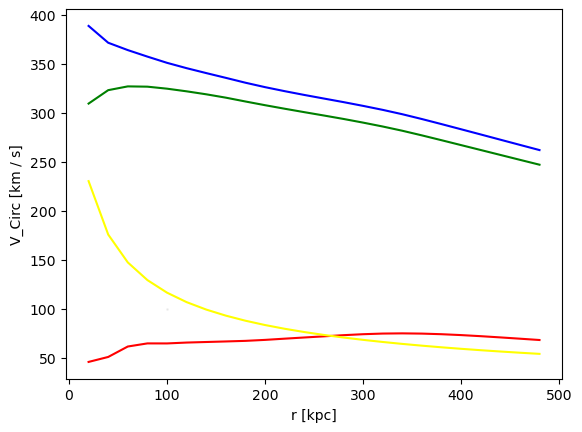

In [10]:
plt.plot(np.arange(start=0, stop=500, step=20), VCirc, 'b')
plt.plot(np.arange(start=0, stop=500, step=20), VCirc_Gas, 'red')
plt.plot(np.arange(start=0, stop=500, step=20), VCirc_Stars, 'yellow')
plt.plot(np.arange(start=0, stop=500, step=20), VCirc_DM, 'green')
plt.scatter(100, 100, 1, 'grey', alpha=0.1)
plt.xlabel('r [kpc]')
plt.ylabel('V_Circ [km / s]')


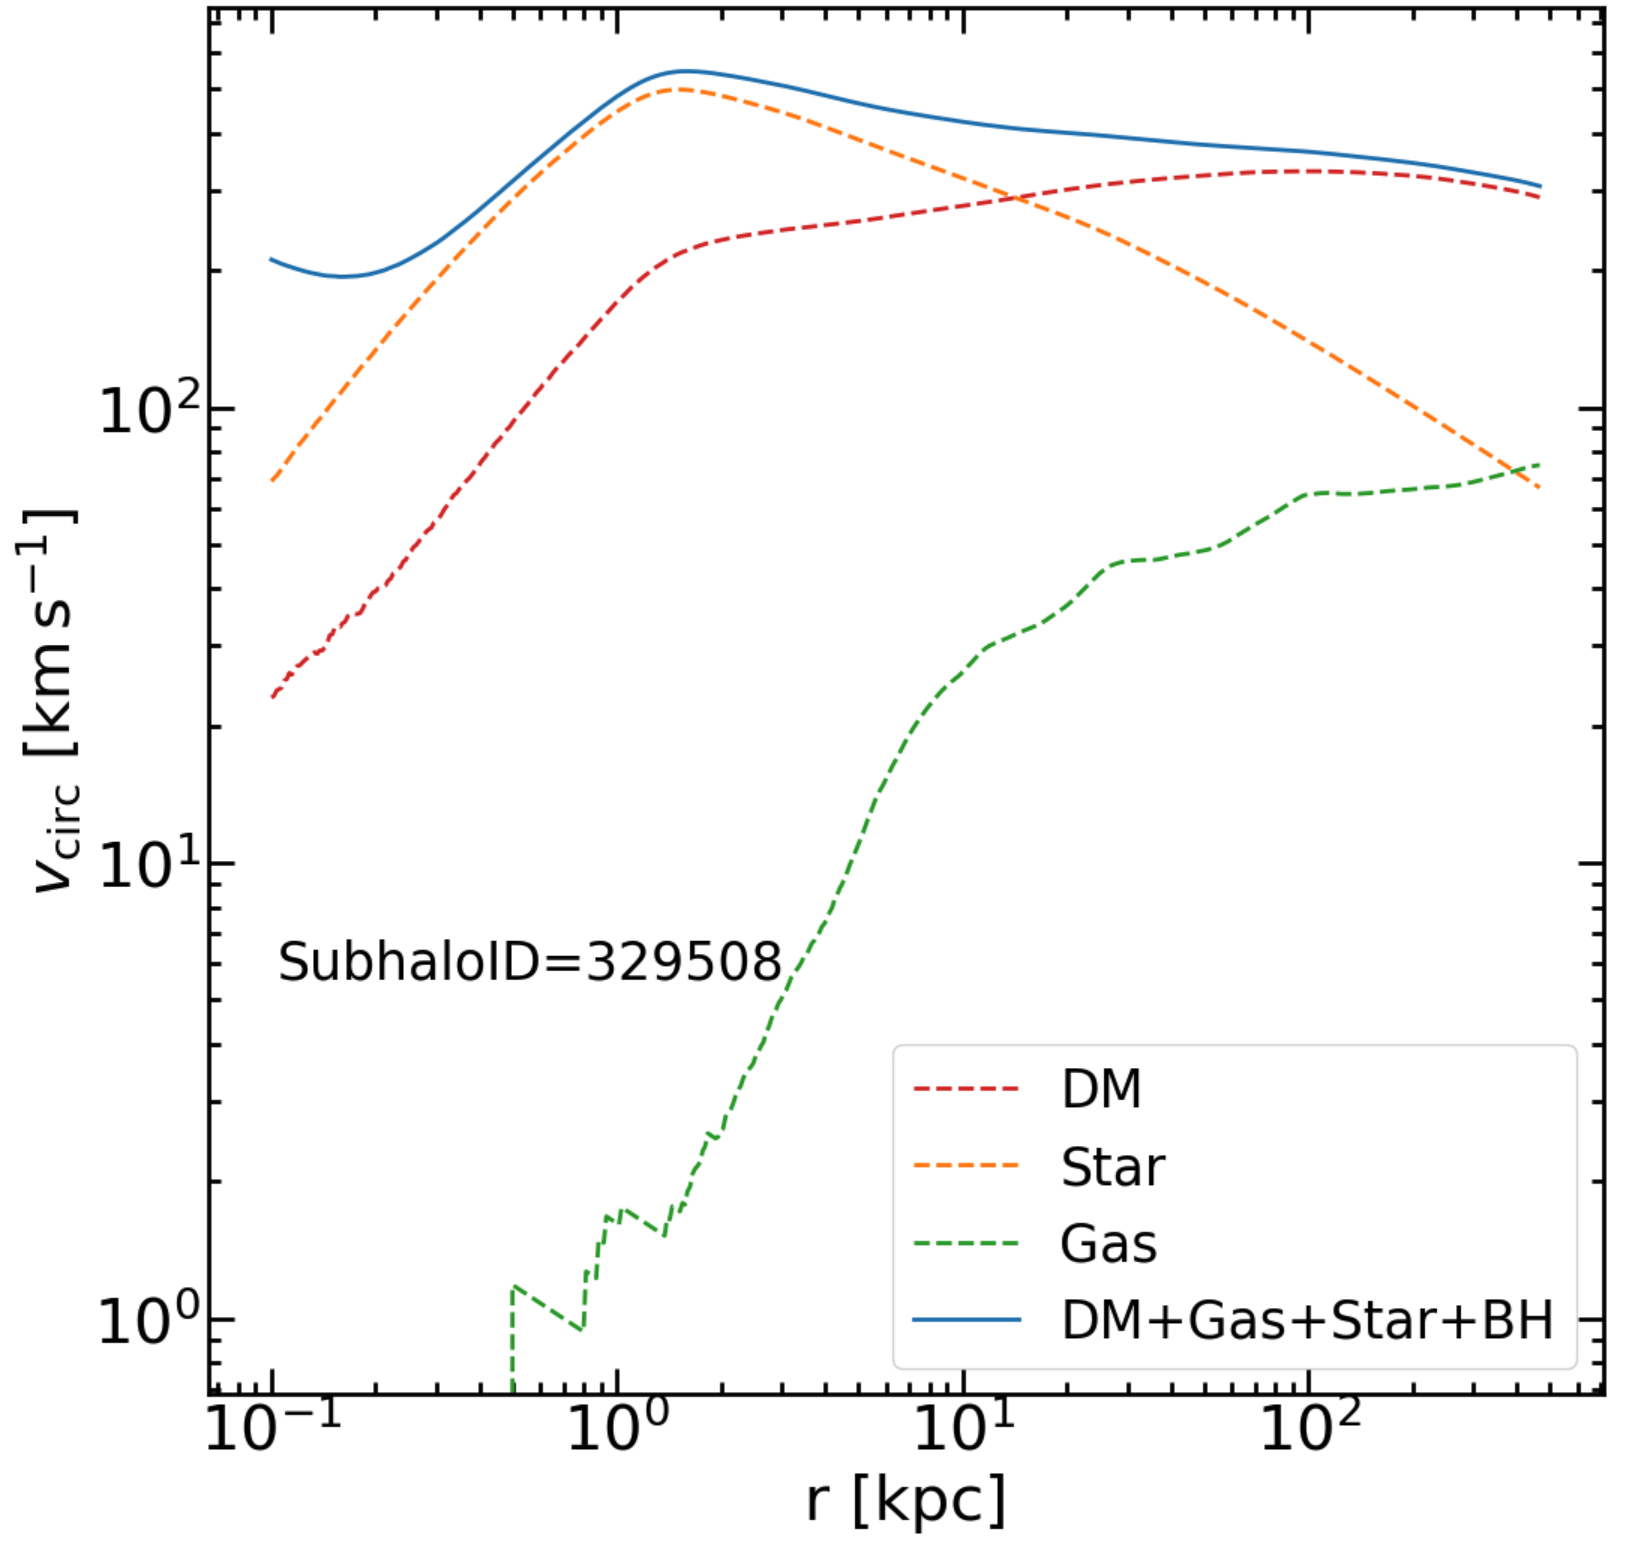

In [6]:
def compute_velocity_distance(PartType0_Dict, Subhalo_Dict, chunk_size=1000):
    N = PartType0_Dict['Coordinates'].shape[0]
    num_chunks = (N + chunk_size - 1) // chunk_size

    norm_velocity_list = []
    tang_velocity_list = []
    distance_list = []

    for i in tqdm(range(num_chunks)):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, N)

        chunk_coordinates = PartType0_Dict['Coordinates'][start:end]
        chunk_velocities = PartType0_Dict['Velocities'][start:end]

        relative_coordinates = chunk_coordinates - Subhalo_Dict['SubhaloPos']
        relative_distance = np.linalg.norm(relative_coordinates, axis=1)
        relative_velocity = chunk_velocities - Subhalo_Dict['SubhaloVel']

        norm_velocity = np.sum(
            relative_velocity * relative_coordinates, axis=1) / relative_distance
        tang_velocity = np.sqrt(
            np.sum(relative_velocity**2, axis=1) - norm_velocity**2)

        norm_velocity_list.append(norm_velocity)
        tang_velocity_list.append(tang_velocity)
        distance_list.append(relative_distance)

    norm_velocity_array = np.concatenate(norm_velocity_list)
    tang_velocity_array = np.concatenate(tang_velocity_list)
    distance_array = np.concatenate(distance_list)

    return norm_velocity_array, tang_velocity_array, distance_array


In [10]:
def plot_velocity_distance(distance, tang_velocity, num_bins=50, distance_range=(0, 700)):
    bin_edges = np.linspace(*distance_range, num=num_bins+1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    bin_indices = np.digitize(distance, bin_edges)

    mean_velocity = np.array(
        [tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])
    std_velocity = np.array([tang_velocity[bin_indices == i].std()
                            for i in range(1, num_bins+1)])

    plt.scatter(distance, tang_velocity, 0.5, 'grey', alpha=0.1)
    plt.errorbar(bin_centers, mean_velocity,
                 yerr=std_velocity, fmt='o-', color='red')

    plt.xlabel('Distance [kpc / h]')
    plt.ylabel('Tangential Velocity [km/s]')


In [7]:
def compute_velocity_distance_with_filter(PartType0_Dict, Subhalo_Dict, x_difference_threshold=50, chunk_size=1000):
    N = PartType0_Dict['Coordinates'].shape[0]
    num_chunks = (N + chunk_size - 1) // chunk_size

    norm_velocity_list = []
    tang_velocity_list = []
    distance_list = []

    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, N)

        chunk_coordinates = PartType0_Dict['Coordinates'][start:end]
        chunk_velocities = PartType0_Dict['Velocities'][start:end]

        # 添加筛选条件：x 坐标与给定 Subhalo_Dict 中的 x 坐标相差在阈值以内
        x_condition = np.abs(chunk_coordinates[:, 0] - Subhalo_Dict['SubhaloPos'][0]) <= x_difference_threshold
        chunk_coordinates = chunk_coordinates[x_condition]
        chunk_velocities = chunk_velocities[x_condition]

        relative_coordinates = chunk_coordinates - Subhalo_Dict['SubhaloPos']
        relative_distance = np.linalg.norm(relative_coordinates, axis=1)
        relative_velocity = chunk_velocities - Subhalo_Dict['SubhaloVel']

        norm_velocity = np.sum(
            relative_velocity * relative_coordinates, axis=1) / relative_distance
        tang_velocity = np.sqrt(
            np.sum(relative_velocity**2, axis=1) - norm_velocity**2)

        norm_velocity_list.append(norm_velocity)
        tang_velocity_list.append(tang_velocity)
        distance_list.append(relative_distance)

    norm_velocity_array = np.concatenate(norm_velocity_list)
    tang_velocity_array = np.concatenate(tang_velocity_list)
    distance_array = np.concatenate(distance_list)

    return norm_velocity_array, tang_velocity_array, distance_array


/tmp/ipykernel_163/294883968.py:8: RuntimeWarning: Mean of empty slice.
  [tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])


Text(0.5, 1.0, '5kpc/h, stars')

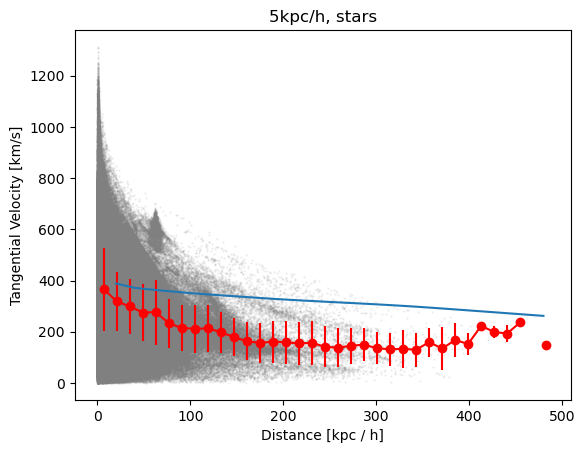

In [25]:
norm_velocity, tang_velocity, distance = compute_velocity_distance_with_filter(
    PartType4_Dict, Subhalo_Dict,x_difference_threshold=10)
plot_velocity_distance(distance, tang_velocity)
plt.plot(np.arange(start=0, stop=500, step=20),VCirc)
plt.title('5kpc/h, stars')


In [31]:
def plot_velocity_distance(distance, tang_velocity, VCirc, VCirc_Gas, VCirc_Stars, VCirc_DM, num_bins=50, distance_range=(0, 700)):
    bin_edges = np.linspace(*distance_range, num=num_bins+1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    bin_indices = np.digitize(distance, bin_edges)

    mean_velocity = np.array(
        [tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])
    std_velocity = np.array([tang_velocity[bin_indices == i].std()
                            for i in range(1, num_bins+1)])

    plt.scatter(distance, tang_velocity, 0.5, 'grey', alpha=0.1)
    plt.errorbar(bin_centers, mean_velocity,
                 yerr=std_velocity, fmt='o-', color='red')

    r = np.arange(start=0, stop=500, step=10)
    plt.plot(r, VCirc, 'b', label='VCirc')
    plt.plot(r, VCirc_Gas, 'red', label='VCirc_Gas')
    plt.plot(r, VCirc_Stars, 'yellow', label='VCirc_Stars')
    plt.plot(r, VCirc_DM, 'green', label='VCirc_DM')

    plt.xlabel('r [kpc]')
    plt.ylabel('V_Circ [km / s]')
    plt.legend()
    plt.show()


In [13]:
distance_range = (0, 500)
num_bins = 25
bin_edges = np.linspace(*distance_range, num=num_bins+1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


In [14]:
dm_norm_velocity, dm_tang_velocity, distance = compute_velocity_distance(
    PartType1_Dict, Subhalo_Dict)
bin_indices = np.digitize(distance, bin_edges)

dm_mean_velocity = np.array(
    [dm_tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])
dm_std_velocity = np.array(
    [dm_tang_velocity[bin_indices == i].std() for i in range(1, num_bins+1)])


  0%|          | 0/22462 [00:00<?, ?it/s]

100%|██████████| 22462/22462 [00:05<00:00, 4396.49it/s]


In [15]:
gas_norm_velocity, gas_tang_velocity, distance = compute_velocity_distance(
    PartType0_Dict, Subhalo_Dict)

bin_indices = np.digitize(distance, bin_edges)

gas_mean_velocity = np.array(
    [gas_tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])
gas_std_velocity = np.array(
    [gas_tang_velocity[bin_indices == i].std() for i in range(1, num_bins+1)])


100%|██████████| 8556/8556 [00:01<00:00, 4686.87it/s]


In [16]:
stars_norm_velocity, stars_tang_velocity, distance = compute_velocity_distance(
    PartType4_Dict, Subhalo_Dict)
bin_indices = np.digitize(distance, bin_edges)

stars_mean_velocity = np.array(
    [stars_tang_velocity[bin_indices == i].mean() for i in range(1, num_bins+1)])
stars_std_velocity = np.array(
    [stars_tang_velocity[bin_indices == i].std() for i in range(1, num_bins+1)])


100%|██████████| 8338/8338 [00:01<00:00, 4725.40it/s]


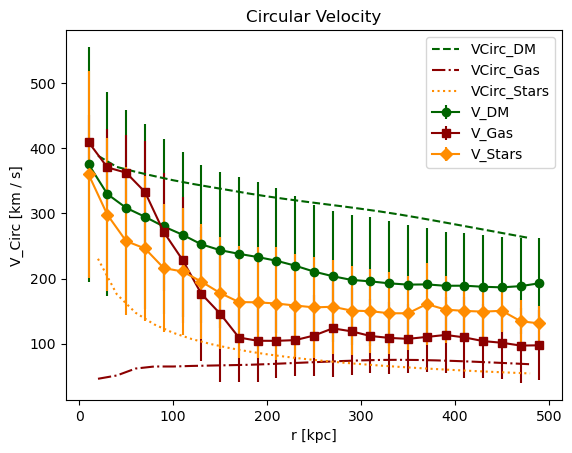

In [18]:
plt.errorbar(bin_centers, dm_mean_velocity, yerr=dm_std_velocity,
             fmt='o-', color='darkgreen', label='V_DM')

plt.errorbar(bin_centers, gas_mean_velocity, yerr=gas_std_velocity,
             fmt='s-', color='darkred', label='V_Gas')

plt.errorbar(bin_centers, stars_mean_velocity, yerr=stars_std_velocity,
             fmt='D-', color='darkorange', label='V_Stars')

r = np.arange(start=0, stop=500, step=20)
plt.plot(r, VCirc, '--', color='darkgreen', label='VCirc_DM')
plt.plot(r, VCirc_Gas, '-.', color='darkred', label='VCirc_Gas')
plt.plot(r, VCirc_Stars, ':', color='darkorange', label='VCirc_Stars')

plt.xlabel('r [kpc]')
plt.ylabel('V_Circ [km / s]')
plt.legend()
plt.title('Circular Velocity')

plt.show()


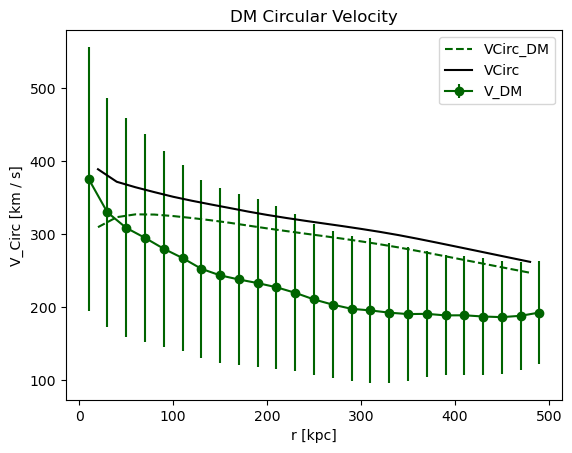

In [26]:
plt.errorbar(bin_centers, dm_mean_velocity, yerr=dm_std_velocity,
             fmt='o-', color='darkgreen', label='V_DM')

plt.plot(r, VCirc_DM, '--', color='darkgreen', label='VCirc_DM')

plt.plot(r, VCirc, color='black', label='VCirc')

plt.xlabel('r [kpc]')
plt.ylabel('V_Circ [km / s]')
plt.legend()
plt.title('DM Circular Velocity')

plt.show()


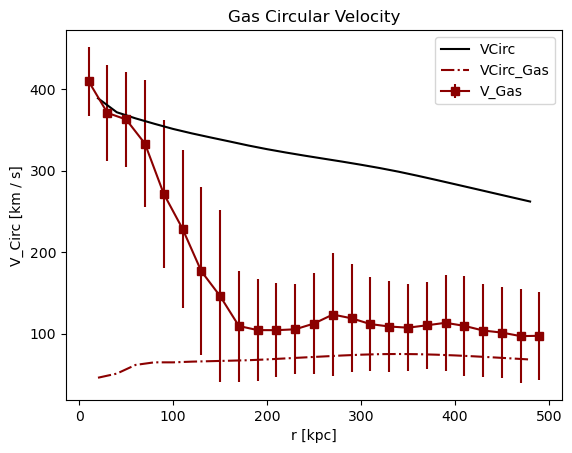

In [25]:
plt.errorbar(bin_centers, gas_mean_velocity, yerr=gas_std_velocity,
             fmt='s-', color='darkred', label='V_Gas')
plt.plot(r, VCirc, color='black', label='VCirc')
plt.plot(r, VCirc_Gas, '-.', color='darkred', label='VCirc_Gas')
plt.xlabel('r [kpc]')
plt.ylabel('V_Circ [km / s]')
plt.legend()
plt.title('Gas Circular Velocity')

plt.show()


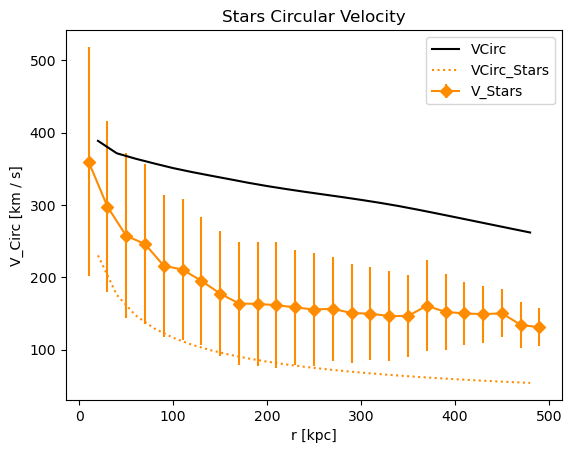

In [27]:
plt.errorbar(bin_centers, stars_mean_velocity, yerr=stars_std_velocity,
             fmt='D-', color='darkorange', label='V_Stars')
plt.plot(r, VCirc, color='black', label='VCirc')
plt.plot(r, VCirc_Stars, ':', color='darkorange', label='VCirc_Stars')

plt.xlabel('r [kpc]')
plt.ylabel('V_Circ [km / s]')
plt.legend()
plt.title('Stars Circular Velocity')

plt.show()
